# Example 1

**Perform A/B Testing to determine if customers in the test group who have been offered 10% discount, are purchasing more items than the customers who are not given any offers.**

In [ ]:
from google.colab import drive

drive.mount('/content/drive');

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.offline as pyoff
import plotly.graph_objs as go
from scipy import stats 

In [ ]:
purchases_dataset = '/content/drive/MyDrive/FDS Practical/purchases.csv'

df = pd.read_csv(purchases_dataset)

df.head()

,Unnamed: 0,customer_id,group,purchase_count
0,0,0,test,0.0
1,1,1,test,0.0
2,2,2,test,1.0
3,3,3,test,2.0
4,4,4,test,0.0


In [ ]:
df.tail()

,Unnamed: 0,customer_id,group,purchase_count
19995,19995,19995,control,0.0
19996,19996,19996,control,1.0
19997,19997,19997,control,0.0
19998,19998,19998,control,0.0
19999,19999,19999,control,1.0


In [ ]:
test_results = df[df.group == 'test'].purchase_count
control_results = df[df.group == 'control'].purchase_count

In [ ]:
hist_data = [test_results, control_results]

group_labels = ['test', 'control']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5,
                         curve_type='normal',show_rug=False)

fig.layout = go.Layout(
        title='Test vs Control',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )


# Plot!
pyoff.iplot(fig)

In [ ]:
test_result = stats.ttest_ind(test_results, control_results)

tstat, pvalue = test_result

pvalue

3.425680208137925e-21

In [ ]:
if pvalue < 0.05:
  print('result is significant')
else:
  print('result is not significant')

result is significant


# Example 2

Let us assume you have 1000 users, 550 were directed to site A, 450 to site B. In site A, 48 users converted. In site B, 56 users converted. **Is this a statistically significant result?**

In [ ]:
num_a, num_b = 550, 450
click_a, click_b = 48, 56
rate_a, rate_b = click_a / num_a, click_b / num_b

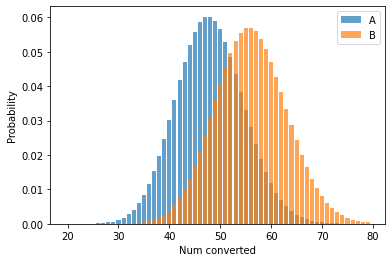

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

# Determine the probability of having x number of click throughs
clicks = np.arange(20, 80)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability");

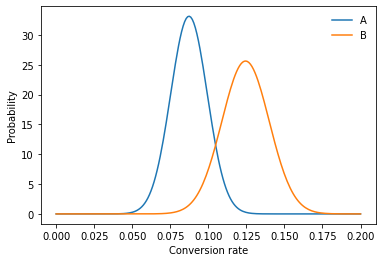

In [ ]:
# Using normal distribution

from scipy.stats import norm

std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

zscore is 1.890, with p-value 0.029


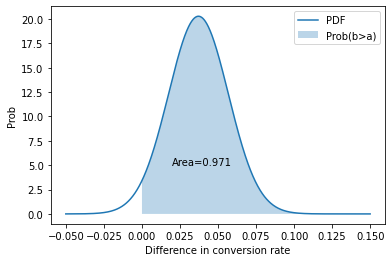

In [ ]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

pvalue = norm().sf(z_score)

print(f"zscore is {z_score:0.3f}, with p-value {pvalue:0.3f}")

In [ ]:
if pvalue < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

we are rejecting null hypothesis
